## Mengimpor Library Python yang Dibutuhkan

In [1]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
import os

* Mengimpor semua library yang dibutuhkan untuk pengolahan data, visualisasi, dan machine learning.

* Menyeting seaborn untuk tampilan grafik.

* Menghilangkan peringatan (warning) agar output bersih saat plotting.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Menyiapkan Dataset yang digunakan

Membaca semua file .csv dalam folder tertentu dan menyimpannya ke dalam dictionary dataframes untuk diakses berdasarkan nama file.

In [5]:
import os
import pandas as pd

# Path ke folder dalam Google Drive
folder_path = '/content/drive/My Drive/Semester6/Informatika Pariwisata'  # Ganti dengan path kamu

# List semua file CSV dalam folder tersebut
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Baca semua file dan simpan dalam dictionary
dataframes = {}
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes[file] = df  # key = nama file, value = dataframe

# Contoh: akses data dari file pertama
first_file_name = csv_files[0]
print(f"Isi dari {first_file_name}:")
print(dataframes[first_file_name].head())


Isi dari tourism_rating.csv:
   User_Id  Place_Id  Place_Ratings
0        1       179              3
1        1       344              2
2        1         5              5
3        1       373              3
4        1       101              4


In [6]:
first_file_name = csv_files[1]
print(f"Isi dari {first_file_name}:")
print(dataframes[first_file_name].head())

Isi dari tourism_with_id.csv:
   Place_Id                         Place_Name  \
0         1                   Monumen Nasional   
1         2                           Kota Tua   
2         3                      Dunia Fantasi   
3         4  Taman Mini Indonesia Indah (TMII)   
4         5           Atlantis Water Adventure   

                                         Description       Category     City  \
0  Monumen Nasional atau yang populer disingkat d...         Budaya  Jakarta   
1  Kota tua di Jakarta, yang juga bernama Kota Tu...         Budaya  Jakarta   
2  Dunia Fantasi atau disebut juga Dufan adalah t...  Taman Hiburan  Jakarta   
3  Taman Mini Indonesia Indah merupakan suatu kaw...  Taman Hiburan  Jakarta   
4  Atlantis Water Adventure atau dikenal dengan A...  Taman Hiburan  Jakarta   

    Price  Rating  Time_Minutes  \
0   20000     4.6          15.0   
1       0     4.6          90.0   
2  270000     4.6         360.0   
3   10000     4.5           NaN   
4   94000    

In [7]:
first_file_name = csv_files[2]
print(f"Isi dari {first_file_name}:")
print(dataframes[first_file_name].head())

Isi dari user.csv:
   User_Id                   Location  Age
0        1      Semarang, Jawa Tengah   20
1        2         Bekasi, Jawa Barat   21
2        3        Cirebon, Jawa Barat   23
3        4         Bekasi, Jawa Barat   21
4        5  Lampung, Sumatera Selatan   20


In [8]:
rating = pd.read_csv(os.path.join(folder_path, 'tourism_rating.csv'))
place = pd.read_csv(os.path.join(folder_path, 'tourism_with_id.csv'))
user = pd.read_csv(os.path.join(folder_path, 'user.csv'))

* tourism_with_id.csv - mengandung informasi
tempak wisata di 5 kota besar di Indonesia (hanya kota Bandung yang dipakai)
* user.csv - mengandung informasi pengguna untuk membuat rekomendasi fitur berdasar pengguna
* tourism_rating.csv - mengandung informasi pengguna, tempat wisata, dan rating untuk membuat sistem rekomendasi berdasar rating

In [9]:
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2


 menghapus kolom

In [10]:
columns_to_drop = [col for col in ['Unnamed: 11', 'Unnamed: 12', 'Time_Minutes']
                  if col in place.columns]
place = place.drop(columns=columns_to_drop, axis=1)

place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


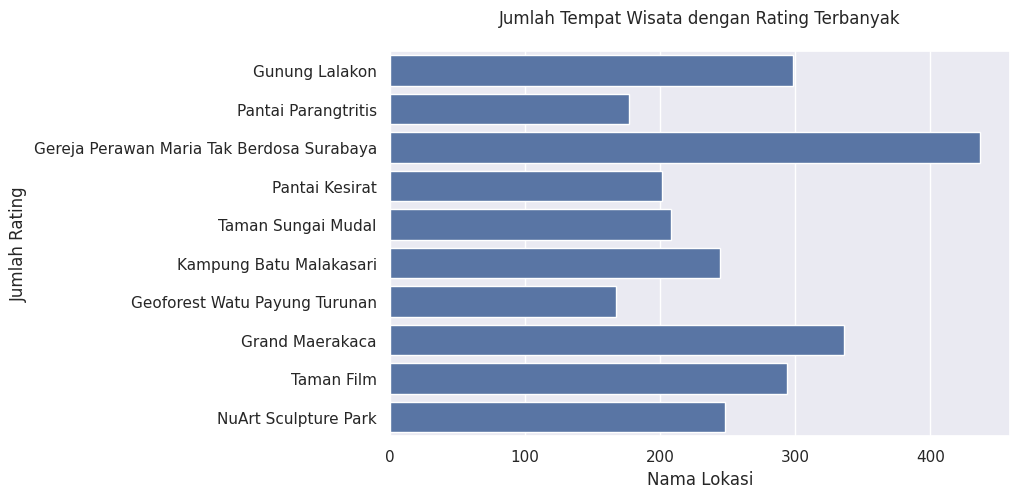

In [11]:
# Membuat dataframe berisi lokasi dengan jumlah rating terbanyak
top_10 = rating['Place_Id'].value_counts().reset_index()[0:10]
# Rename the 'index' column to 'Place_Id' for consistency
top_10 = top_10.rename(columns={'index': 'Place_Id'})
top_10 = pd.merge(top_10, place[['Place_Id','Place_Name']], how='left', left_on='Place_Id', right_on='Place_Id')

# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot(x='Place_Id', y='Place_Name', data=top_10)  # Use 'Place_Id' for x-axis
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Lokasi')
plt.show()

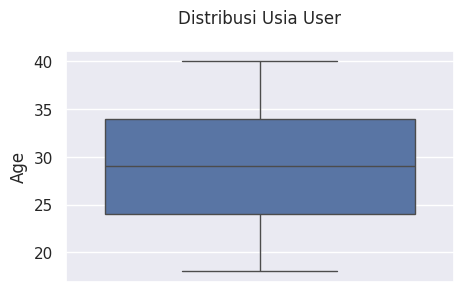

In [12]:

# Membuat visualisasi distribusi usia user

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

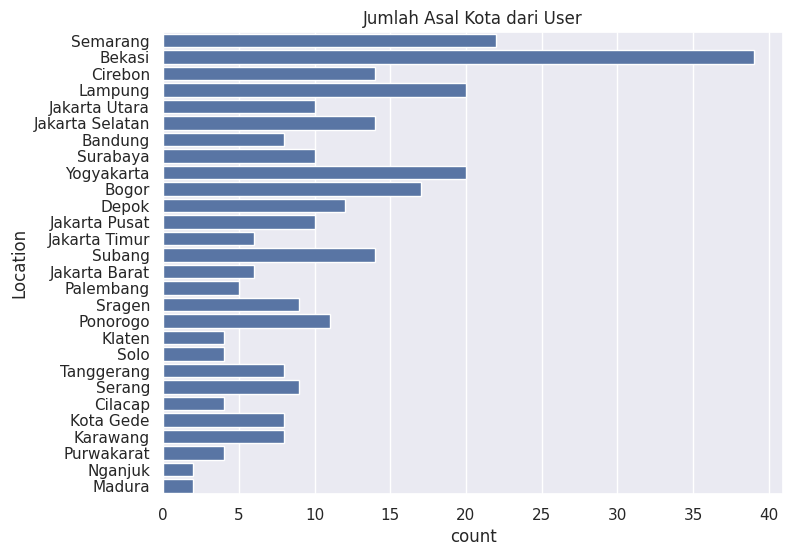

In [13]:
# Memfilter asal kota dari user
askot = user['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

## Menggabungkan Data

Menggabungkan ketiga DataFrame (rating, place, user) menjadi satu DataFrame final_data berdasarkan Place_Id dan User_Id.

In [26]:
# Menggabungkan ratings dengan places berdasarkan Place_Id
merged_data = pd.merge(rating, place, on='Place_Id', how='inner')

# Menggabungkan hasil tersebut dengan users berdasarkan User_Id
final_data = pd.merge(merged_data, user, on='User_Id', how='inner')

# Melihat hasil penggabungan
print("Hasil Penggabungan Data:")
final_data

Hasil Penggabungan Data:


,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long,Location,Age
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416,"Semarang, Jawa Tengah",20
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1,"{'lat': -6.948877, 'lng': 110.3893285}",-6.948877,110.389329,"Semarang, Jawa Tengah",20
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,"Semarang, Jawa Tengah",20
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,"{'lat': -7.264598899999997, 'lng': 110.4046017}",-7.264599,110.404602,"Semarang, Jawa Tengah",20
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0,"{'lat': -7.792189999999999, 'lng': 110.362151}",-7.792190,110.362151,"Semarang, Jawa Tengah",20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya,35000,4.1,"{'lat': -7.247796300000002, 'lng': 112.7998235}",-7.247796,112.799824,"Ponorogo, Jawa Timur",26
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Budaya,Jakarta,2000,4.7,"{'lat': -6.204630300000001, 'lng': 106.8365324}",-6.204630,106.836532,"Ponorogo, Jawa Timur",26
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Cagar Alam,Bandung,25000,4.3,"{'lat': -6.829411199999999, 'lng': 107.6874666}",-6.829411,107.687467,"Ponorogo, Jawa Timur",26
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Tempat Ibadah,Bandung,0,4.8,"{'lat': -6.925963500000001, 'lng': 107.6354278}",-6.925963,107.635428,"Ponorogo, Jawa Timur",26


## Mengecek Missing Values

* Mengecek dan menampilkan jumlah nilai kosong (missing values) di setiap kolom.

* Menampilkan baris-baris yang mengandung nilai kosong.

In [15]:
# Mengecek missing values di final_data
missing_values = final_data.isnull().sum()

# Menampilkan jumlah missing values di setiap kolom
print("Jumlah Missing Values per Kolom:")
print(missing_values)

# Jika ingin melihat baris yang memiliki missing values, bisa menggunakan:
missing_rows = final_data[final_data.isnull().any(axis=1)]

# Menampilkan baris dengan missing values
print("\nBaris dengan Missing Values:")
print(missing_rows)


Jumlah Missing Values per Kolom:
User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
Category         0
City             0
Price            0
Rating           0
Coordinate       0
Lat              0
Long             0
Location         0
Age              0
dtype: int64

Baris dengan Missing Values:
Empty DataFrame
Columns: [User_Id, Place_Id, Place_Ratings, Place_Name, Description, Category, City, Price, Rating, Coordinate, Lat, Long, Location, Age]
Index: []


## Filter Kolom Penting

Memilih hanya kolom-kolom yang dibutuhkan dari final_data untuk analisis selanjutnya.

In [28]:
# Memilih kolom yang diinginkan
selected_columns = ['User_Id', 'Place_Id','Place_Name', 'Category', 'Price', 'Rating', 'Place_Ratings']

# Membuat DataFrame baru dengan hanya kolom yang diperlukan
filtered_data = final_data[selected_columns]

# Melihat hasilnya
print("Data yang telah difilter:")
print(filtered_data)

# Menyimpan hasil filter ke dalam file CSV
filtered_data.to_csv("filtered_data.csv", index=False)
print("Data berhasil disimpan ke file 'filtered_data.csv'")

Data yang telah difilter:
      User_Id  Place_Id                         Place_Name       Category  \
0           1       179                    Candi Ratu Boko         Budaya   
1           1       344                      Pantai Marina         Bahari   
2           1         5           Atlantis Water Adventure  Taman Hiburan   
3           1       373             Museum Kereta Ambarawa         Budaya   
4           1       101      Kampung Wisata Sosro Menduran         Budaya   
...       ...       ...                                ...            ...   
9995      300       425        Waterpark Kenjeran Surabaya  Taman Hiburan   
9996      300        64     Museum Sasmita Loka Ahmad Yani         Budaya   
9997      300       311                 The Lodge Maribaya     Cagar Alam   
9998      300       279  Masjid Agung Trans Studio Bandung  Tempat Ibadah   
9999      300       163                Watu Mabur Mangunan     Cagar Alam   

      Price  Rating  Place_Ratings  
0     75000 

In [29]:
filtered_data

,User_Id,Place_Id,Place_Name,Category,Price,Rating,Place_Ratings
0,1,179,Candi Ratu Boko,Budaya,75000,4.6,3
1,1,344,Pantai Marina,Bahari,3000,4.1,2
2,1,5,Atlantis Water Adventure,Taman Hiburan,94000,4.5,5
3,1,373,Museum Kereta Ambarawa,Budaya,10000,4.5,3
4,1,101,Kampung Wisata Sosro Menduran,Budaya,0,4.0,4
...,...,...,...,...,...,...,...
9995,300,425,Waterpark Kenjeran Surabaya,Taman Hiburan,35000,4.1,2
9996,300,64,Museum Sasmita Loka Ahmad Yani,Budaya,2000,4.7,4
9997,300,311,The Lodge Maribaya,Cagar Alam,25000,4.3,3
9998,300,279,Masjid Agung Trans Studio Bandung,Tempat Ibadah,0,4.8,4



# Memilih kolom yang diinginkan
selected_columns = ['User_Id', 'Place_Id','Place_Name', 'Category', 'Price', 'Rating', 'Place_Ratings']

# Membuat DataFrame baru dengan hanya kolom yang diperlukan
filtered_data = final_data[selected_columns]

# Melihat hasilnya
print("Data yang telah difilter:")
print(filtered_data)


In [ ]:
# # Membuat DataFrame baru dengan hanya kolom yang diperlukan
# filtered_data = final_data[selected_columns]
# # Melihat hasilnya
# print("Data yang telah difilter:")
# print(filtered_data.head())

## One-Hot Encoding Kategori

* Melakukan encoding terhadap kolom Category menjadi fitur numerik (one-hot encoding).

* Menggabungkan hasil encoding ke filtered_data untuk membentuk final_data

In [17]:
from sklearn.preprocessing import OneHotEncoder

# Membuat encoder
# Mengganti 'sparse=False' dengan 'sparse_output=False'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Melatih encoder dan transformasi data kategori
category_encoded = encoder.fit_transform(filtered_data[['Category']])

# Menggabungkan hasil encoding dengan data asli
encoded_columns = encoder.get_feature_names_out(['Category'])
encoded_df = pd.DataFrame(category_encoded, columns=encoded_columns)

# Gabungkan ke data utama (drop kolom 'Category' lama)
# Pastikan index direset agar penggabungan berjalan lancar
final_data = pd.concat([filtered_data.drop(columns=['Category']).reset_index(drop=True),
                        encoded_df.reset_index(drop=True)], axis=1)


print("Data setelah One-Hot Encoding dengan sklearn:")
final_data

Data setelah One-Hot Encoding dengan sklearn:


,User_Id,Place_Id,Place_Name,Price,Rating,Place_Ratings,Category_Bahari,Category_Budaya,Category_Cagar Alam,Category_Pusat Perbelanjaan,Category_Taman Hiburan,Category_Tempat Ibadah
0,1,179,Candi Ratu Boko,75000,4.6,3,0.0,1.0,0.0,0.0,0.0,0.0
1,1,344,Pantai Marina,3000,4.1,2,1.0,0.0,0.0,0.0,0.0,0.0
2,1,5,Atlantis Water Adventure,94000,4.5,5,0.0,0.0,0.0,0.0,1.0,0.0
3,1,373,Museum Kereta Ambarawa,10000,4.5,3,0.0,1.0,0.0,0.0,0.0,0.0
4,1,101,Kampung Wisata Sosro Menduran,0,4.0,4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,300,425,Waterpark Kenjeran Surabaya,35000,4.1,2,0.0,0.0,0.0,0.0,1.0,0.0
9996,300,64,Museum Sasmita Loka Ahmad Yani,2000,4.7,4,0.0,1.0,0.0,0.0,0.0,0.0
9997,300,311,The Lodge Maribaya,25000,4.3,3,0.0,0.0,1.0,0.0,0.0,0.0
9998,300,279,Masjid Agung Trans Studio Bandung,0,4.8,4,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Data setelah One-Hot Encoding dengan sklearn:")
print(final_data.head())  # cek data


Data setelah One-Hot Encoding dengan sklearn:
   User_Id  Place_Id                     Place_Name  Price  Rating  \
0        1       179                Candi Ratu Boko  75000     4.6   
1        1       344                  Pantai Marina   3000     4.1   
2        1         5       Atlantis Water Adventure  94000     4.5   
3        1       373         Museum Kereta Ambarawa  10000     4.5   
4        1       101  Kampung Wisata Sosro Menduran      0     4.0   

   Place_Ratings  Category_Bahari  Category_Budaya  Category_Cagar Alam  \
0              3              0.0              1.0                  0.0   
1              2              1.0              0.0                  0.0   
2              5              0.0              0.0                  0.0   
3              3              0.0              1.0                  0.0   
4              4              0.0              1.0                  0.0   

   Category_Pusat Perbelanjaan  Category_Taman Hiburan  Category_Tempat Ibadah  
0

## Buat Label Target

Membuat kolom target Liked berdasarkan nilai rating (rating ≥ 4.5 dianggap disukai).

In [19]:
# Contoh: anggap rating >= 4.5 itu "disukai" (Liked=1), selainnya 0
final_data['Liked'] = (final_data['Rating'] >= 4.5).astype(int)

print(final_data[['Place_Name', 'Rating', 'Liked']])


                             Place_Name  Rating  Liked
0                       Candi Ratu Boko     4.6      1
1                         Pantai Marina     4.1      0
2              Atlantis Water Adventure     4.5      1
3                Museum Kereta Ambarawa     4.5      1
4         Kampung Wisata Sosro Menduran     4.0      0
...                                 ...     ...    ...
9995        Waterpark Kenjeran Surabaya     4.1      0
9996     Museum Sasmita Loka Ahmad Yani     4.7      1
9997                 The Lodge Maribaya     4.3      0
9998  Masjid Agung Trans Studio Bandung     4.8      1
9999                Watu Mabur Mangunan     4.5      1

[10000 rows x 3 columns]


## Pisah Fitur dan Label + Normalisasi

* Memisahkan fitur (X) dan label (y).

* Melakukan normalisasi pada fitur menggunakan StandardScaler.



In [20]:
# Pisahkan fitur dan label
X = final_data.drop(columns=['Liked', 'Place_Name', 'User_Id', 'Place_Id'])
y = final_data['Liked']

# Scaling fitur
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split Data

Membagi data menjadi data latih dan data uji (75:25).

In [21]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

print("Ukuran data latih kecil:", X_train.shape)
print("Ukuran data uji kecil:", X_test.shape)


Ukuran data latih kecil: (7500, 9)
Ukuran data uji kecil: (2500, 9)


## Melatih Model SVM

Melatih model Support Vector Machine (SVM) menggunakan kernel RBF.

In [22]:
# Train SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)


SVC(C=1, random_state=42)

## Evaluasi Model

Mengevaluasi kinerja model SVM dengan berbagai metrik klasifikasi.

In [23]:
# Evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred = svm_model.predict(X_test)

print("Akurasi   :", accuracy_score(y_test, y_pred))
print("Presisi   :", precision_score(y_test, y_pred))
print("Recall    :", recall_score(y_test, y_pred))
print("F1 Score  :", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi   : 1.0
Presisi   : 1.0
Recall    : 1.0
F1 Score  : 1.0

Confusion Matrix:
 [[1171    0]
 [   0 1329]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1171
           1       1.00      1.00      1.00      1329

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



Akurasi   : 1.0
Presisi   : 1.0
Recall    : 1.0
F1 Score  : 1.0


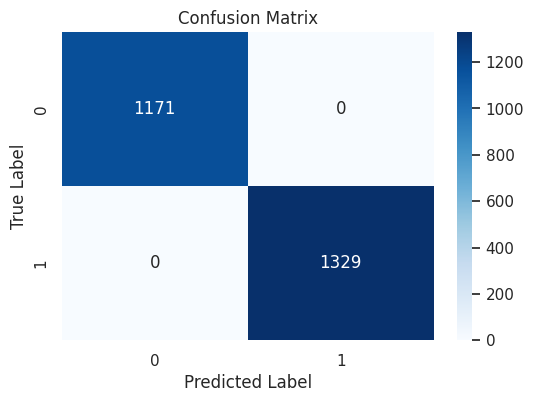


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1171
           1       1.00      1.00      1.00      1329

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prediksi
y_pred = svm_model.predict(X_test)

# Evaluasi
print("Akurasi   :", accuracy_score(y_test, y_pred))
print("Presisi   :", precision_score(y_test, y_pred, average='binary'))  # Ubah 'binary' jika multiclass
print("Recall    :", recall_score(y_test, y_pred, average='binary'))
print("F1 Score  :", f1_score(y_test, y_pred, average='binary'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = svm_model.classes_  # atau tentukan manual seperti: labels = ['Negatif', 'Positif']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


## Antarmuka Rekomendasi Tempat Wisata (Interaktif)

* Membuat antarmuka interaktif untuk menampilkan tempat wisata berdasarkan kategori (Category) dan rentang harga (Price).

* Menampilkan hasil filter dalam bentuk tabel interaktif saat tombol diklik.

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Ambil DataFrame yang sudah di-preprocess dan di-encode
df = final_data

# Ambil kolom kategori yang hasil one-hot encoding
category_columns = [col for col in df.columns if col.startswith('Category_')]

# Validasi kolom kategori
if not category_columns:
    print("❌ Tidak ditemukan kolom kategori (Category_...) di DataFrame.")
else:
    # Dropdown untuk memilih kategori
    category_dropdown = widgets.Dropdown(
        options=category_columns,
        description='Kategori:',
        value=category_columns[0]
    )

    # Dropdown untuk memilih rentang harga
    price_ranges = {
        "0 - 10.000": (0, 10000),
        "10.001 - 50.000": (10001, 50000),
        "> 50.000": (50001, float('inf'))
    }

    price_range_dropdown = widgets.Dropdown(
        options=list(price_ranges.keys()),
        description='Harga:',
        value="0 - 10.000"
    )

    # Tombol dan output
    button = widgets.Button(description="Tampilkan Rekomendasi")
    output = widgets.Output()

    def on_button_clicked(b):
        with output:
            clear_output()
            selected_category = category_dropdown.value
            selected_range_label = price_range_dropdown.value
            price_min, price_max = price_ranges[selected_range_label]

            if selected_category in df.columns and 'Price' in df.columns:
                # Filter sesuai kategori dan rentang harga
                filtered = df[
                    (df[selected_category] == 1.0) &
                    (df['Price'] >= price_min) &
                    (df['Price'] <= price_max)
                ]

                # Hapus duplikat berdasarkan Place_Name
                filtered = filtered.drop_duplicates(subset='Place_Name')

                # Tampilkan hasil
                display_cols = ['Place_Name', 'Price', 'Rating']
                existing_cols = [col for col in display_cols if col in filtered.columns]
                if not filtered.empty and existing_cols:
                    display(filtered[existing_cols].sort_values(by='Rating', ascending=False))
                else:
                    print("⚠️ Tidak ada tempat wisata yang sesuai.")
            else:
                print("❌ Kolom kategori atau harga tidak ditemukan.")

    button.on_click(on_button_clicked)

    # Tampilkan antarmuka
    display(category_dropdown, price_range_dropdown, button, output)


Dropdown(description='Kategori:', options=('Category_Bahari', 'Category_Budaya', 'Category_Cagar Alam', 'Categ…

Dropdown(description='Harga:', options=('0 - 10.000', '10.001 - 50.000', '> 50.000'), value='0 - 10.000')

Button(description='Tampilkan Rekomendasi', style=ButtonStyle())

Output()

In [ ]:
# Misalnya saat training
feature_columns = [col for col in df.columns if col.startswith('Category_') or col == 'Price']
X_train = df[feature_columns]
# Use the 'Liked' column as the target for the classification model
y_train = df['Liked'] # CHANGE THIS LINE

# Import SVC from sklearn.svm
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

import pickle # Import the pickle module

with open('model_rekomendasi.pkl', 'wb') as f:
    pickle.dump((model, feature_columns), f)

In [ ]:
# Jalankan sekali untuk menyimpan
with open("final_data.pkl", "wb") as f:
    pickle.dump(final_data, f)
